<a href="https://colab.research.google.com/github/rafae1franco/BreastCancer_evaluate/blob/main/BreastCancer_evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
columns = ['id', 'diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.1)

Epoch 1/150
41/41 [==============================] - 2s 7ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0246 - val_accuracy: 0.9783
Epoch 2/150
41/41 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 3/150
41/41 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9783
Epoch 4/150
41/41 [==============================] - 0s 3ms/step - loss: 7.9427e-04 - accuracy: 1.0000 - val_loss: 0.0228 - val_accuracy: 0.9783
Epoch 5/150
41/41 [==============================] - 0s 3ms/step - loss: 5.7466e-04 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 0.9783
Epoch 6/150
41/41 [==============================] - 0s 4ms/step - loss: 4.7135e-04 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 0.9783
Epoch 7/150
41/41 [==============================] - 0s 3ms/step - loss: 3.6165e-04 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 0.97

In [ ]:
def predict_breast_cancer(features):
  features = scaler.transform([features])
  prediction = model.predict(features)
  return 'Maligno' if prediction[0] > 0.5 else 'Benigno'

y_pred = model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

4/4 [==============================] - 0s 5ms/step
Model Accuracy: 98.25%


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Previsao: Maligno, Atual: Benigno


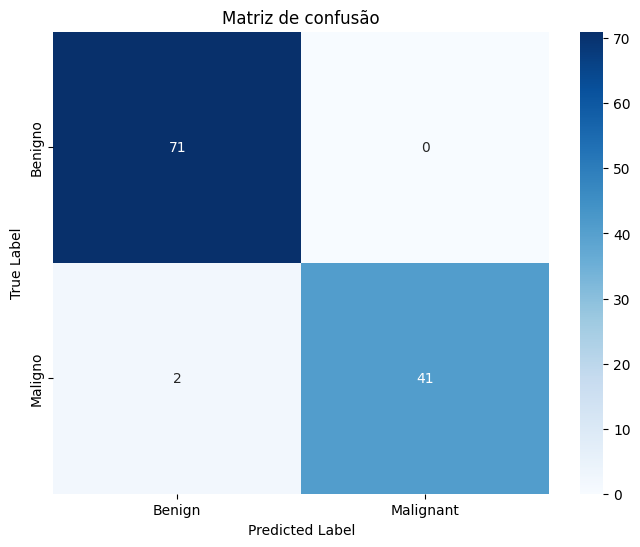

In [ ]:
example_features = X_test[0]
print(f'Previsao: {predict_breast_cancer(example_features)}, Atual: {"Maligno" if y_test[0] == 1 else "Benigno"}')

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusão')
plt.show()